<a href="https://colab.research.google.com/github/Ruani-Filipe/TechChallenge1FIAP/blob/main/Tech_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto - Pós Tech FIAP - Regressão Linear

Projeto do primeiro trimestre para modelagem de algoritmo em machine learning utilizando dados de plano de saúde

Autores:
* Alexsander Maia Simas
* Erick Bognar
* Leonardo Guedes
* Ruâni Filipe
* Talita Hipolito

> **Informações do dataset**: "insurance.csv"
>Dataset retirado da plataforma "kaggle" - https://www.kaggle.com/datasets/mirichoi0218/insurance/data

>> **Colunas**
>>* Age: Idade
>>* Sex: Sexo - Feminino:1 e Masculino:0
>>* bmi: IMC - Índice de massa corporal, este calculo utiliza o peso e a altura da pessoa (kg/altura^2)
>>* Children: Número de filhos
>>* Smoker: Fumante - Sim:1 e Não:0
>>* Region: Northeast(Nordeste)-1, Southeast(Sudeste)-2, southwest(Sudoeste)-3 e Northwest(Noroeste)-4
>>* Charges: Encargos de despesas médicas individuais cobradas pelo seguro de saúde.

In [ ]:
# Instalando pacote watermark
!pip install -q -U watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Versão dos pacotes usados neste Colab Notebook
%reload_ext watermark
%watermark -a "Leonardo Guedes - Alexsander Simas - Ruâni Filipe - Erick Bognar - Talita Hipolito" --iversion

Author: Leonardo Guedes - Alexsander Simas - Ruâni Felipe - Erick Bognar - Talita Hipolito

sklearn   : 1.6.1
matplotlib: 3.10.0
numpy     : 2.0.2
pandas    : 2.2.2
seaborn   : 0.13.2
plotly    : 5.24.1



In [ ]:
df = pd.read_csv('insurance.csv') # Leitura do Arquivo

In [ ]:
print(df.head()) # Visualizar as primeiras linhas

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [ ]:
print(df.info()) # Visualizar info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [ ]:
print(df.isnull().sum()) # Visualizar Existencia de Valores Nulls

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


## Organização de etapas do projeto
A partir deste ponto, iremos reorganizar o projeto para tornar o código mais claro e compreensível para todos os participantes.

* 1º Converter as colunas que atualmente possuem valores do tipo object para inteiro ou float.
* 2º Refazer a análise de correlação e verificar se houve alterações nos resultados.



### Modificação das colunas com valores inteiros - Engenharia de atributos

In [ ]:
# Vamos modificar as colunas "sex" e "smoker" que possuem valores "object" para "int64" - Aplicado a técnica de "map"
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [ ]:
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


#### Verificação estatística visual - Detecção de Outliers (coluna alvo)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df['charges'],
                     boxpoints='outliers',
                     marker_color='blue',
                     line_color='blue'))
fig.update_layout(title='Distribuição estatística da coluna "Charges"',
                  xaxis_title="Taxas",
                  yaxis_title='',
                  template='plotly_white')
fig.show()

#### Verificação estatística visual - Detecção de Outliers (demais colunas)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df['age'],
                     boxpoints='outliers',
                     marker_color='gold',
                     line_color='gold'))
fig.update_layout(title='Distribuição estatística da coluna "Age"',
                  xaxis_title="Taxas",
                  yaxis_title='',
                  template='plotly_white')
fig.show()

#### Verificação estatística visual - Detecção de Outliers (demais colunas)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df['bmi'],
                     boxpoints='outliers',
                     marker_color='green',
                     line_color='green'))
fig.update_layout(title='Distribuição estatística da coluna "IMC"',
                  xaxis_title="IMC",
                  yaxis_title='',
                  template='plotly_white')
fig.show()

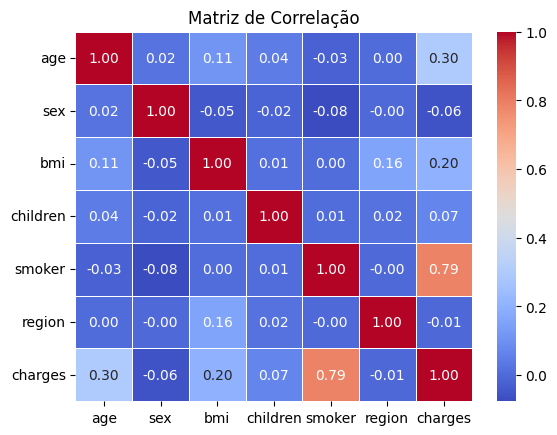

In [ ]:
df_numeric = df.select_dtypes(include=['int64', 'float64'])

if len(df_numeric.columns) < 2:
    raise ValueError("O DataFrame precisa ter pelo menos 2 colunas numéricas.")

sns.heatmap(
    df_numeric.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5
   )
plt.title("Matriz de Correlação")
plt.show()

### Preparando um modelo primário

In [ ]:
X = df.drop(columns=['charges'])
y = df['charges'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=7)

In [ ]:
def calcular_metricas_regressao(y_test, y_pred):

  # Calculate RMSE manually for compatibility with older scikit-learn versions
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)

  # Calcular acurácia em porcentagem para R²
  acuracia_r2 = r2 * 100

  # Calcular acurácia em porcentagem para MSE
  acuracia_mse = (1 - rmse / np.var(y_test)) * 100

  metricas = {
      'Raiz do erro quadrático médio': round(rmse, 4),
      'Erro Absoluto médio': round(mae, 4),
      'R2 Score': round(r2, 4),
      'Acurácia (R²)':"{}%".format(round(acuracia_r2, 4)),
      'Acurácia MSE':"{}%".format(round(acuracia_mse, 4))
  }

  return metricas

#### Testando com algoritmos resistentes a dados assimétricos

##### Algoritmo XGBoost

In [ ]:
from xgboost import XGBRegressor
modelo_xgboost_primario = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
resultado_xgboost = modelo_xgboost_primario.fit(X_train, y_train)
y_pred_xgboost = resultado_xgboost.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_xgboost)

{'Raiz do erro quadrático médio': np.float64(4933.1586),
 'Erro Absoluto médio': 2819.454,
 'R2 Score': 0.8336,
 'Acurácia (R²)': '83.3583%',
 'Acurácia MSE': '99.9966%'}

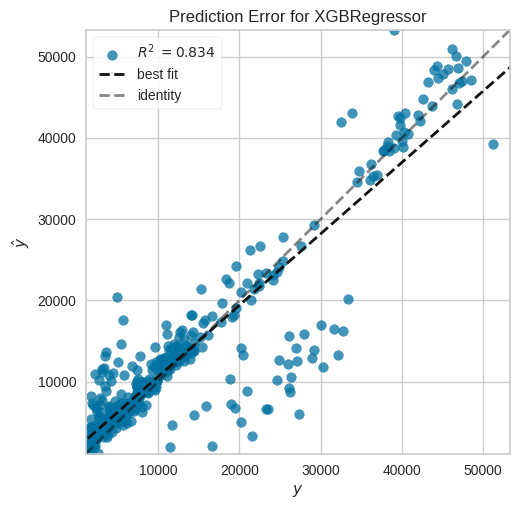

In [ ]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(modelo_xgboost_primario, X_train, y_train, X_test, y_test)

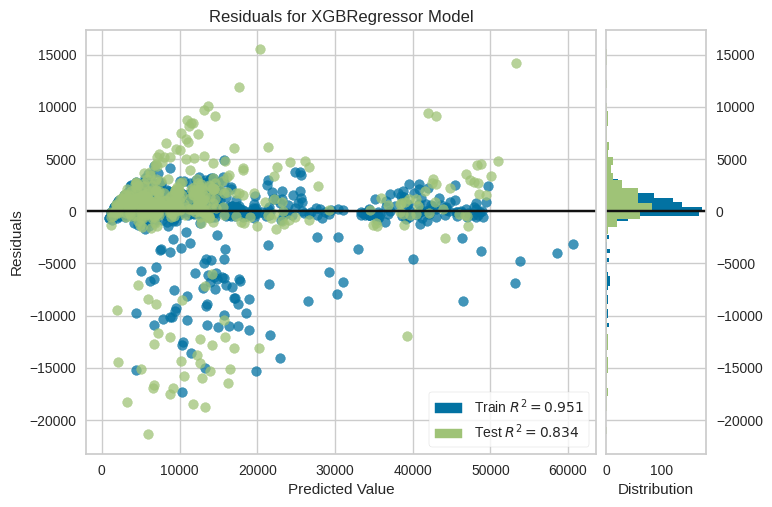

In [ ]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(modelo_xgboost_primario, X_train, y_train, X_test, y_test)

##### Algoritmo Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model_rf_primário = RandomForestRegressor(max_depth=5, random_state=7)
model_rf_primário.fit(X_train, y_train)
y_pred_rf = model_rf_primário.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_rf)

{'Raiz do erro quadrático médio': np.float64(4668.1638),
 'Erro Absoluto médio': 2657.4274,
 'R2 Score': 0.851,
 'Acurácia (R²)': '85.0982%',
 'Acurácia MSE': '99.9968%'}

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



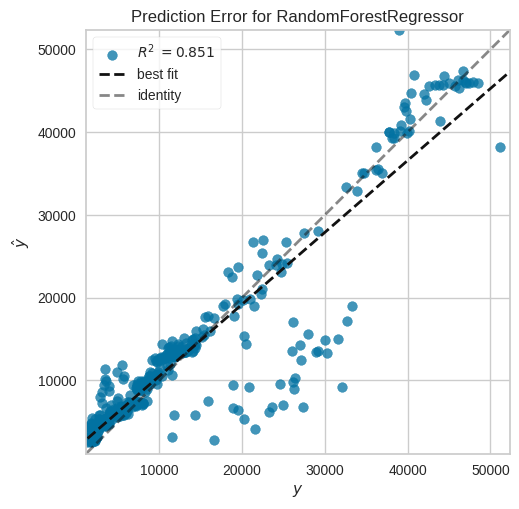

In [ ]:
visualizer = prediction_error(model_rf_primário, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



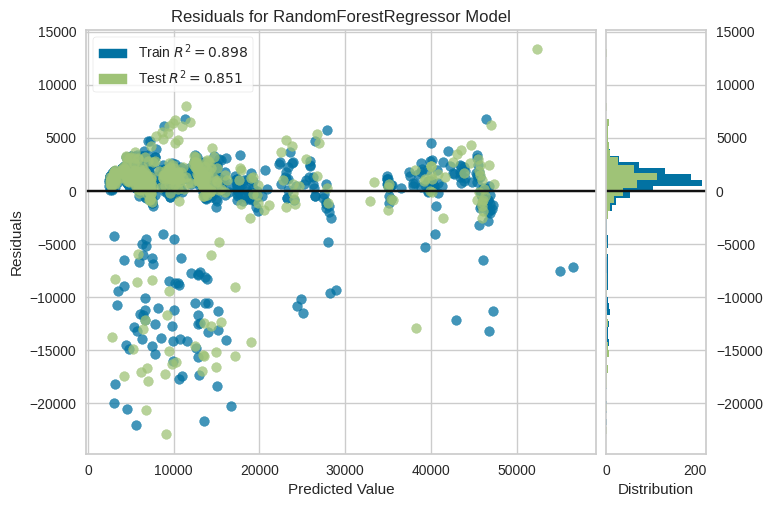

In [ ]:
viz = residuals_plot(model_rf_primário, X_train, y_train, X_test, y_test)

## Testando com adição de dados sinteticos

### Imputando novos valores sinteticos

In [ ]:
original_size = len(df)
new_size = 6000

# Gerando dados sintéticos para colunas numéricas
df_synthetic = pd.DataFrame({
    'age': np.random.normal(df['age'].mean(), df['age'].std(), new_size).astype(int),
    'bmi': np.random.normal(df['bmi'].mean(), df['bmi'].std(), new_size),
    'children': np.random.poisson(df['children'].mean(), new_size),
    'charges': np.random.normal(df['charges'].mean(), df['charges'].std(), new_size)
})

# Gerando dados sintéticos para colunas categóricas (como 'smoker', 'sex', 'region')
# Removido os colchetes extras em 'p' para garantir que seja 1-dimensional
df_synthetic['smoker'] = np.random.choice(['yes', 'no'], size=new_size, p=df['smoker'].value_counts(normalize=True).sort_index())
df_synthetic['sex'] = np.random.choice(['male', 'female'], size=new_size, p=df['sex'].value_counts(normalize=True).sort_index())
df_synthetic['region'] = np.random.choice(df['region'].unique(), size=new_size, p=df['region'].value_counts(normalize=True).sort_index().values)

# Combinando os dados originais + sintéticos
df_final = pd.concat([df, df_synthetic], ignore_index=True)

print(f"Dataset original: {original_size} linhas")
print(f"Dataset final: {len(df_final)} linhas")

Dataset original: 1338 linhas
Dataset final: 7338 linhas


In [ ]:
df_final = df_final[df_final['charges'] >= 0]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_final['charges'],
                     boxpoints='outliers',
                     marker_color='blue',
                     line_color='blue'))
fig.update_layout(title='Distribuição estatística da coluna "Charges"',
                  xaxis_title="Taxas",
                  yaxis_title='',
                  template='plotly_white')
fig.show()

In [ ]:
df_final = df_final[df_final['age'] >= 0]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_final['age'],
                     boxpoints='outliers',
                     marker_color='gold',
                     line_color='gold'))
fig.update_layout(title='Distribuição estatística da coluna "Age"',
                  xaxis_title="Taxas",
                  yaxis_title='',
                  template='plotly_white')
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_final['bmi'],
                     boxpoints='outliers',
                     marker_color='green',
                     line_color='green'))
fig.update_layout(title='Distribuição estatística da coluna "IMC"',
                  xaxis_title="IMC",
                  yaxis_title='',
                  template='plotly_white')
fig.show()

In [ ]:
df_final = df_final[df_final['bmi'] >= 14]

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=df_final['bmi'],
                     boxpoints='outliers',
                     marker_color='green',
                     line_color='green'))
fig.update_layout(title='Distribuição estatística da coluna "IMC"',
                  xaxis_title="IMC",
                  yaxis_title='',
                  template='plotly_white')
fig.show()

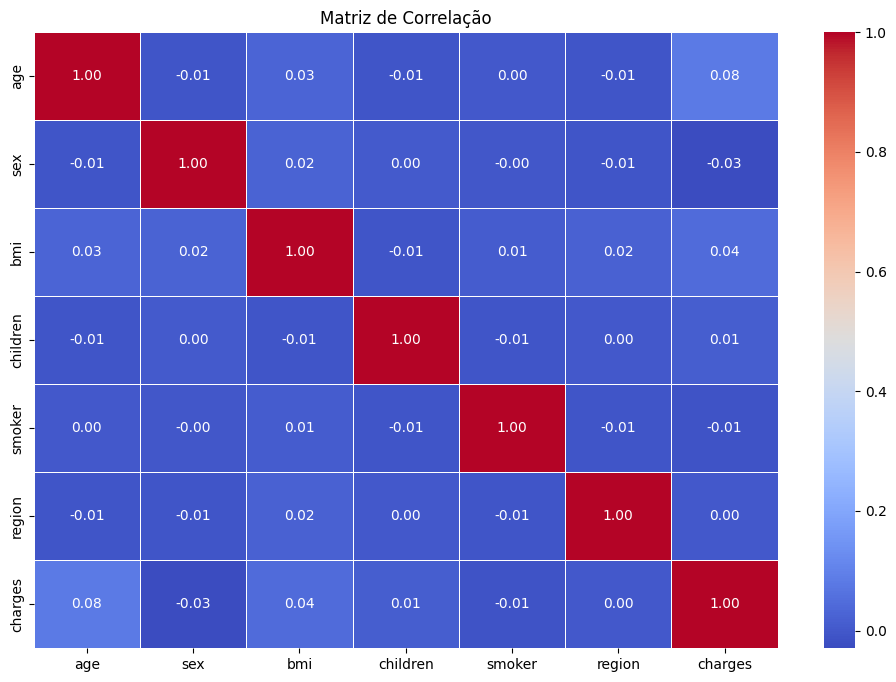

In [ ]:
plt.figure(figsize=(12, 8))

df_final['sex'] = df_final['sex'].map({'male': 0, 'female': 1})
df_final['smoker'] = df_final['smoker'].map({'yes': 1, 'no': 0})


le_final = LabelEncoder()
df_final['region'] = le_final.fit_transform(df_final['region'])


sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
corr_spearman = df_final.corr(method='spearman')['charges'].sort_values(ascending=False)
print(corr_spearman)

charges     1.000000
age         0.095279
bmi         0.033894
children    0.023883
region     -0.007477
smoker     -0.012232
sex        -0.025291
Name: charges, dtype: float64


### Preparação do dataset para treinamento do algoritmo

In [ ]:
X1 = df_final[['age', 'bmi', 'children', 'region', 'smoker', 'sex']]
y1 = df_final['charges']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1,test_size=0.3, random_state=7)

In [ ]:
modelo_xgboost_secundario = XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1)
resultado_xgboost = modelo_xgboost_secundario.fit(X1_train, y1_train)
y1_pred_xgboost = resultado_xgboost.predict(X1_test)
calcular_metricas_regressao(y1_test, y1_pred_xgboost)

{'Raiz do erro quadrático médio': np.float64(10443.1567),
 'Erro Absoluto médio': 8393.9075,
 'R2 Score': 0.0019,
 'Acurácia (R²)': '0.1906%',
 'Acurácia MSE': '99.9904%'}

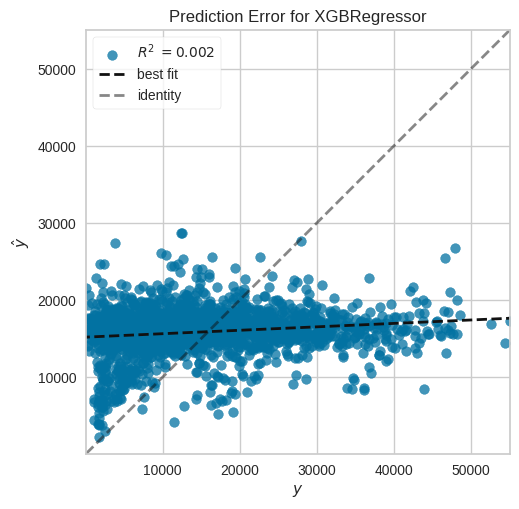

In [ ]:
from yellowbrick.regressor import prediction_error
visualizer = prediction_error(modelo_xgboost_secundario, X1_train, y1_train, X1_test, y1_test)

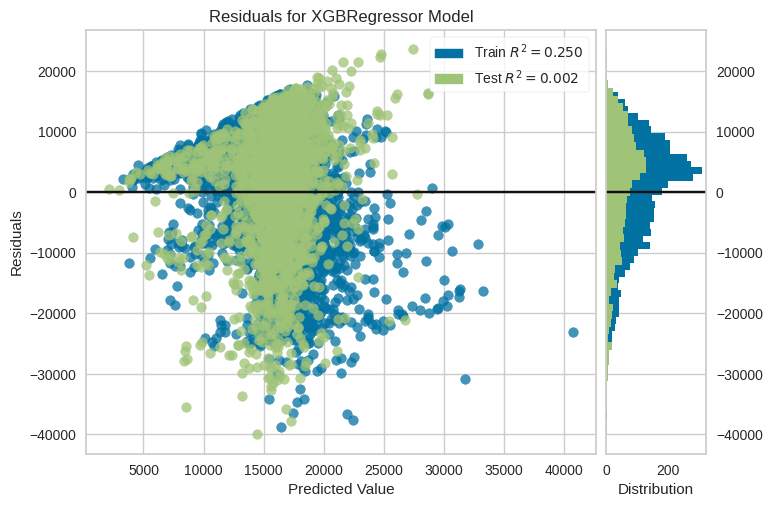

In [ ]:
viz = residuals_plot(modelo_xgboost_secundario, X1_train, y1_train, X1_test, y1_test)

In [ ]:
model_rf_secundario = RandomForestRegressor(max_depth=5, random_state=7)
model_rf_secundario.fit(X1_train, y1_train)
y1_pred_rf = model_rf_secundario.predict(X1_test)
calcular_metricas_regressao(y1_test, y1_pred_rf)

{'Raiz do erro quadrático médio': np.float64(10215.5223),
 'Erro Absoluto médio': 8274.9776,
 'R2 Score': 0.0449,
 'Acurácia (R²)': '4.4944%',
 'Acurácia MSE': '99.9907%'}

Ficou muito ruim o resultado, posso tentar melhorar com outras tecnicas.

In [ ]:
from sklearn.linear_model import LinearRegression
# Treina o modelo
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

# Faz uma previsão
y_pred_lr = model_lr.predict(X_test)
calcular_metricas_regressao(y_test, y_pred_lr)

{'Raiz do erro quadrático médio': np.float64(6027.1292),
 'Erro Absoluto médio': 4243.5928,
 'R2 Score': 0.7516,
 'Acurácia (R²)': '75.159%',
 'Acurácia MSE': '99.9959%'}

## Código antigo

In [ ]:
df = pd.get_dummies(df, drop_first=True)

# Converte bools para int
df = df.apply(lambda col: col.astype(int) if col.dtype == 'bool' else col)

# Separação de features e target
X = df.drop(columns=['charges'])
y = df['charges'].values

In [ ]:
# Remove colunas específicas do DataFrame
df = df.drop(columns=['sex_male', 'region_northwest', 'region_southeast', 'region_southwest'])

# Atualiza X e y após remoção
X = df.drop(columns=['charges'])
y = df['charges'].values


KeyError: "['sex_male', 'region_northwest', 'region_southeast', 'region_southwest'] not found in axis"

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   charges     1338 non-null   float64
 4   smoker_yes  1338 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 52.4 KB
None


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Divide os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treina o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Faz uma previsão
y_pred = model.predict(X_test)
print("Previsões:", y_pred)
print("Reais:", y_test)

Previsões: [ 8550.90921341  6969.71599759 36794.13661808  9421.86824203
 26875.01095777 11101.26514111   141.44896605 16750.22436643
   743.78364016 11157.63586446 28521.42342227  9296.15962897
  5456.5831315  38513.59317763 40362.63211366 37226.61219261
 15312.47750251 36042.83494384  9322.40796481 31395.64230108
  4273.49461256 10468.62243337  2723.96491222  6575.5287315
 11228.01912269 12468.20703945 14803.23875441  6062.13408867
  9531.77127863  2381.73787018  9470.9842188  12959.38866372
  4702.13338911  3410.73606761  4819.65393639 12488.16536441
  2355.2166747   9157.11135848 33234.15784494 32746.69484389
  4270.42403098  4233.52485656 14431.41993531 11388.84943272
  8929.60714179 12484.19557109  5150.40526844  3550.1037231
 35652.7853174   9280.12457197 15967.47938558  2556.74541518
 12158.95859481  1066.73450634 13555.51395976 12107.63444981
  3933.78585209 32050.44566484 13634.05117632 12397.82378122
 14493.62754566 10572.23545909 16669.43245629  7717.46643965
 11362.88637442

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   charges     1338 non-null   float64
 4   smoker_yes  1338 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 52.4 KB
None


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 5829.38
R²: 0.78
MAE: 4213.80


In [ ]:
from sklearn.tree import DecisionTreeRegressor

modelTree = DecisionTreeRegressor(random_state=42)
modelTree.fit(X_train, y_train)
# Faz uma previsão
y_predTree = modelTree.predict(X_test)
print("Previsões:", y_predTree)
print("Reais:", y_test)

Previsões: [ 8615.3       4399.731    28950.4692    9500.57305  33732.6867
 11326.71487   1628.4709   14410.9321    2680.9493   10702.6424
 19361.9988    7640.3092    4040.55825  46200.9851   48173.361
 48885.13561   9304.7019   41676.0811    8232.6388   21348.706
  4877.98105   8116.26885   2128.43105   2026.9741   10702.6424
 10435.06525  13635.6379    4260.744     9225.2564   11774.159275
  7512.267    11353.2276    2020.177     4906.40965   3392.3652
  8342.90875   2102.2647    6849.026    24667.419    37742.5757
 18838.70366   2639.0429   11763.0009   12142.5786    4670.64
 12913.9924   26018.95052  23241.47453  40273.6455   24915.04626
 13981.85035   1720.3537    6610.1097    1632.56445  10976.24575
  9630.397     3353.284    58571.07448  12430.95335  27346.04207
 14043.4767    4686.3887   31620.00106   6710.1919   10797.3362
  4337.7352   21472.4788   11741.726     3378.91      2026.9741
  5488.262     9414.92      8280.6227    7209.4918    8347.1643
  4399.731     4449.462    1

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_predTree))
r2 = r2_score(y_test, y_predTree)
mae = mean_absolute_error(y_test, y_predTree)

In [ ]:
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 6758.94
R²: 0.71
MAE: 3114.22


In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelForest = RandomForestRegressor(random_state=42)
modelForest.fit(X_train, y_train)
# Faz uma previsão
y_predForest = modelForest.predict(X_test)
print("Previsões:", y_predForest)
print("Reais:", y_test)

Previsões: [ 9882.4940694   5081.4703475  28083.5223505   9366.6445375
 34670.4064271   7865.9306998   1618.3866585  14464.363662
  5115.9055634  10629.5195504  19774.9012987   7105.863854
  5607.7415305  46138.7222147  48479.5905387  45696.6084749
  9753.2204036  42999.9257968   9568.7642844  24258.7950341
 10101.2818245  10444.207782    2194.58789625  1999.1078365
 11814.2948539  10877.6189911  13276.0448825   5613.0857388
  9855.1574432  10933.80923254  7984.0536784  11636.6351257
  1920.315656    5410.6734213   4050.2413226   9087.5734613
  2695.8580895   8745.6867496  23349.272912   39392.3214805
 11503.8350827   2732.8221732  11606.4247658  14980.2648358
  5869.5822192  13386.1455414  12749.2283904  13118.9926864
 41800.2995306   8242.5121989  13894.7930975   4274.35507848
  6814.6052644   1687.414467   11204.3998067  10058.8683476
  3502.986977   43951.2302315  13921.8868373  16608.967742
 13923.390691    6967.3167418  21466.5485829   7672.5382488
 10627.8651489   6829.7218092  

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_predForest))
r2 = r2_score(y_test, y_predForest)
mae = mean_absolute_error(y_test, y_predForest)

In [ ]:
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 4675.30
R²: 0.86
MAE: 2517.44


In [ ]:
correlacoes = df.corr(numeric_only=True)

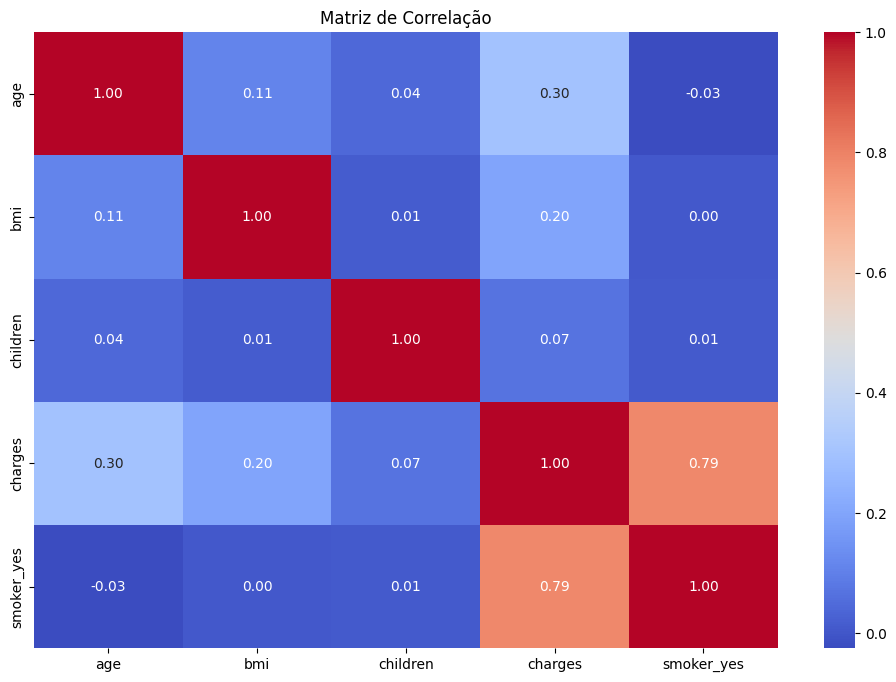

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(correlacoes, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

smoker_yes: 0.6086
bmi: 0.2336
age: 0.1361
children: 0.0217


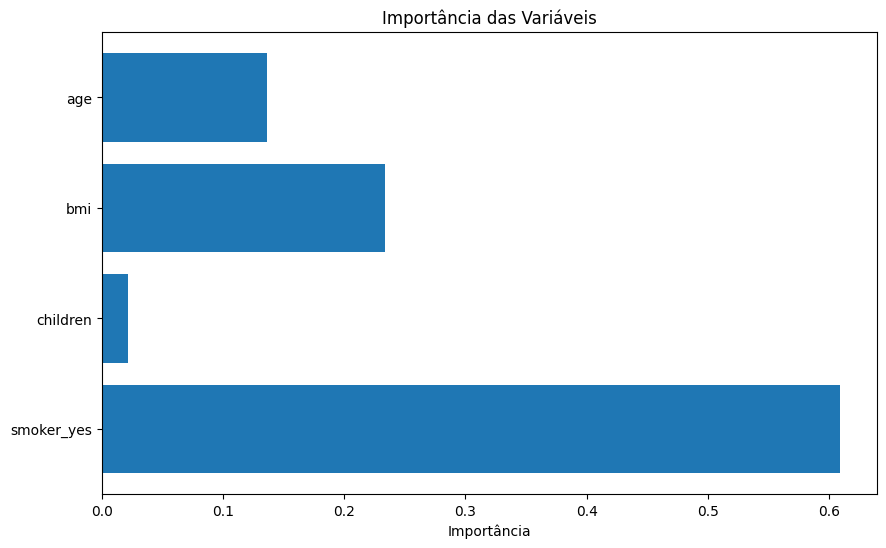

In [ ]:
importancias = modelForest.feature_importances_
nomes = X.columns

# Exibir em ordem decrescente
for nome, imp in sorted(zip(nomes, importancias), key=lambda x: x[1], reverse=True):
    print(f"{nome}: {imp:.4f}")

plt.figure(figsize=(10, 6))
plt.barh(nomes, importancias)
plt.xlabel("Importância")
plt.title("Importância das Variáveis")
plt.gca().invert_yaxis()
plt.show()

In [ ]:
df.head()

,age,bmi,children,charges,smoker_yes
0,19,27.900,0,16884.92400,1
1,18,33.770,1,1725.55230,0
2,28,33.000,3,4449.46200,0
3,33,22.705,0,21984.47061,0
4,32,28.880,0,3866.85520,0
